# Statistical Analysis of Heart Disease Dataset
  
**Course:** Statistical and Mathematical Methods For Data Analysis  

## 1. Overview
This notebook presents a statistical analysis of a heart disease dataset.
The aim of the study is to investigate whether there is a statistically significant difference
in age between individuals with and without heart disease.
Appropriate statistical tests are selected after formally checking the required assumptions.


## 2. Dataset Description
The dataset contains clinical and demographic information of individuals.
The primary variables used in this analysis are:

- **Age:** Age of the individual (continuous variable)
- **HeartDisease:** Indicator variable  
  - 0 = No heart disease  
  - 1 = Heart disease

The dataset is divided into two independent groups based on heart disease status.


## 3. Research Question
Is there a statistically significant difference in age between individuals
with heart disease and those without heart disease?


## 4. Statistical Hypotheses

Let:
- Group 1 represent individuals without heart disease
- Group 2 represent individuals with heart disease

**Null Hypothesis (H₀):**  
There is no significant difference in age between individuals with and without heart disease.

**Alternative Hypothesis (H₁):**  
There is a significant difference in age between individuals with and without heart disease.

**Significance Level:**
The significance level for this analysis is set at α = 0.05.



In [3]:
import sys
!{sys.executable} -m pip install numpy pandas scikit-learn matplotlib seaborn tensorflow

In [4]:
!pip install pandas

In [6]:
from google.colab import files

uploaded = files.upload()

Saving heart.csv to heart.csv


## 5. Dataset Loading
The heart disease dataset was uploaded to Google Colab and loaded into a pandas DataFrame for analysis.
Initial inspection was performed to ensure the data was successfully imported.


In [8]:
import pandas as pd

df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 6. Data Preparation
The dataset was divided into two independent groups based on heart disease status:
- Individuals without heart disease (HeartDisease = 0)
- Individuals with heart disease (HeartDisease = 1)

The age variable was extracted for each group for subsequent statistical analysis.


In [11]:
no_heart_disease=df[df['target']==0]['age']
heart_disease=df[df['target']==1]['age']

## 7. Assumption Checking: Normality

Normality of the age distributions for both groups was assessed using the Shapiro–Wilk test.

- **Null hypothesis (H₀):** Age is normally distributed  
- **Alternative hypothesis (H₁):** Age is not normally distributed  

The test results indicated that the normality assumption was violated (p < 0.05), necessitating the use of a non-parametric statistical test.


In [12]:
from scipy.stats import shapiro
print("heart_disease_normality",shapiro(heart_disease))
print("no_heart_disease_normality",shapiro(no_heart_disease))

heart_disease_normality ShapiroResult(statistic=np.float64(0.9862677883936357), pvalue=np.float64(7.32310737063842e-05))
no_heart_disease_normality ShapiroResult(statistic=np.float64(0.9653528889221158), pvalue=np.float64(1.8359318429630063e-09))


## 8. Exploratory Visualization

The visualizations above illustrate the distribution of age for individuals with and without heart disease.
These plots provide an intuitive understanding of differences in central tendency and variability between the two groups.


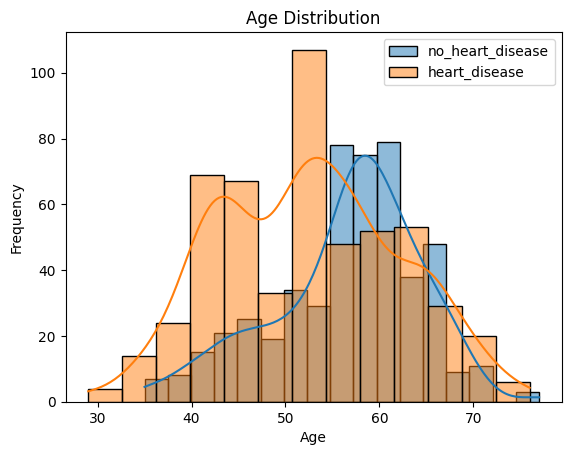

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(no_heart_disease, kde=True, label="no_heart_disease")
sns.histplot(heart_disease, kde=True, label="heart_disease")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## 9. Statistical Test: Mann–Whitney U Test

Due to the violation of the normality assumption and the presence of two independent groups, the Mann–Whitney U test was applied.


In [14]:
from scipy.stats import mannwhitneyu

statistic, pvalue = mannwhitneyu(no_heart_disease, heart_disease, alternative='two-sided')

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {pvalue}")

alpha = 0.05
if pvalue < alpha:
    print("Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.")
    print("There is a statistically significant difference in age between individuals with and without heart disease.")
else:
    print("Since the p-value is greater than the significance level (alpha=0.05), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in age between individuals with and without heart disease.")

Mann-Whitney U statistic: 167644.0
P-value: 1.4676312173703235e-14
Since the p-value is less than the significance level (alpha=0.05), we reject the null hypothesis.
There is a statistically significant difference in age between individuals with and without heart disease.


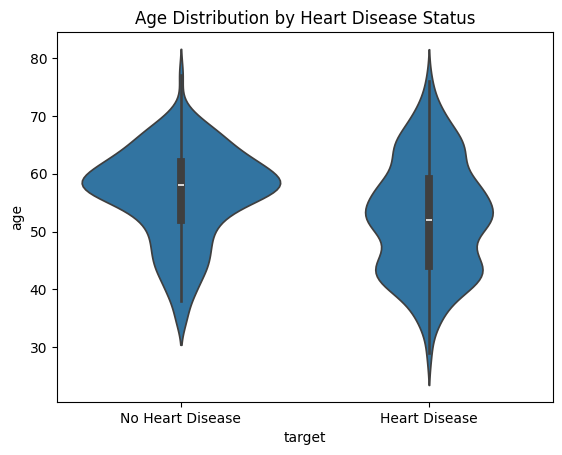

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='target', y='age', data=df)
plt.xticks([0,1], ['No Heart Disease', 'Heart Disease'])
plt.title('Age Distribution by Heart Disease Status')
plt.show()


## 10. Comprehensive Exploratory Data Analysis (EDA)




**Reasoning**:
To begin the extensive EDA, I will display a concise summary of the DataFrame, generate descriptive statistics for numerical columns, and calculate the number of missing values for each column. This provides a foundational understanding of the data's structure, central tendencies, spread, and completeness.



In [17]:
print("DataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
df.describe()

print("\nMissing Values:")
df.isnull().sum()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Descriptive Statistics:

Missing Values:


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**Reasoning**:
To visualize the distributions of numerical features, I will create histograms and box plots for each, using subplots to manage the layout effectively. This will help in understanding the shape, central tendency, spread, and identifying potential outliers for each numerical variable.



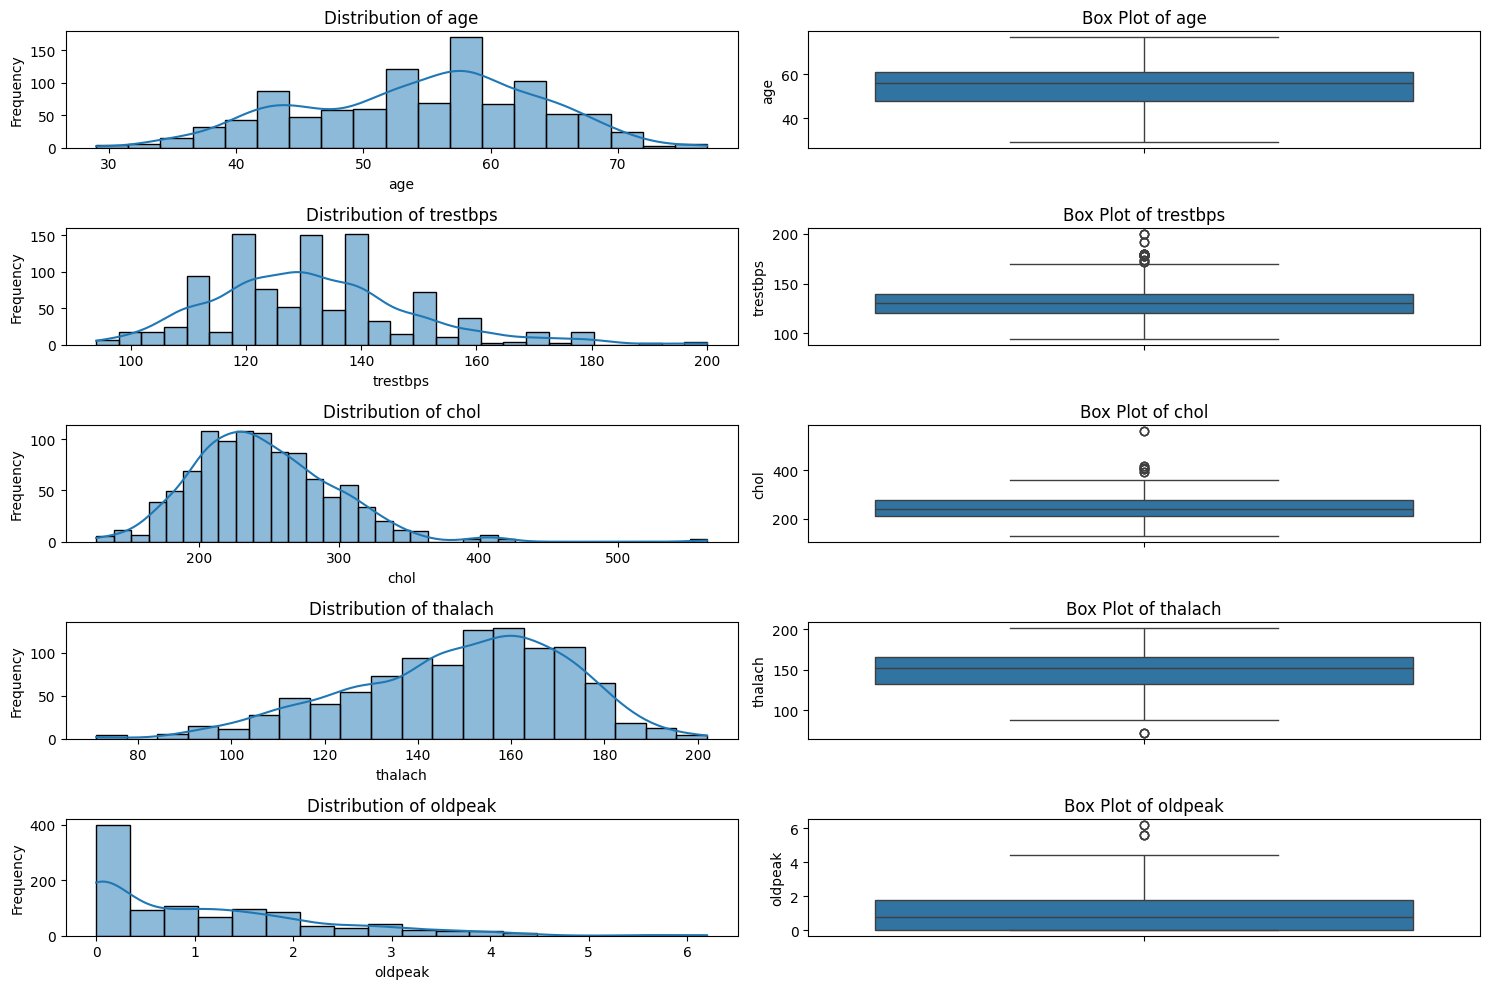

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Visualize numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, 2*i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(len(numerical_cols), 2, 2*i + 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Reasoning**:
Now that the numerical features have been visualized, I will proceed to create count plots for all categorical features. This will help in understanding the distribution and frequency of each category within these variables.



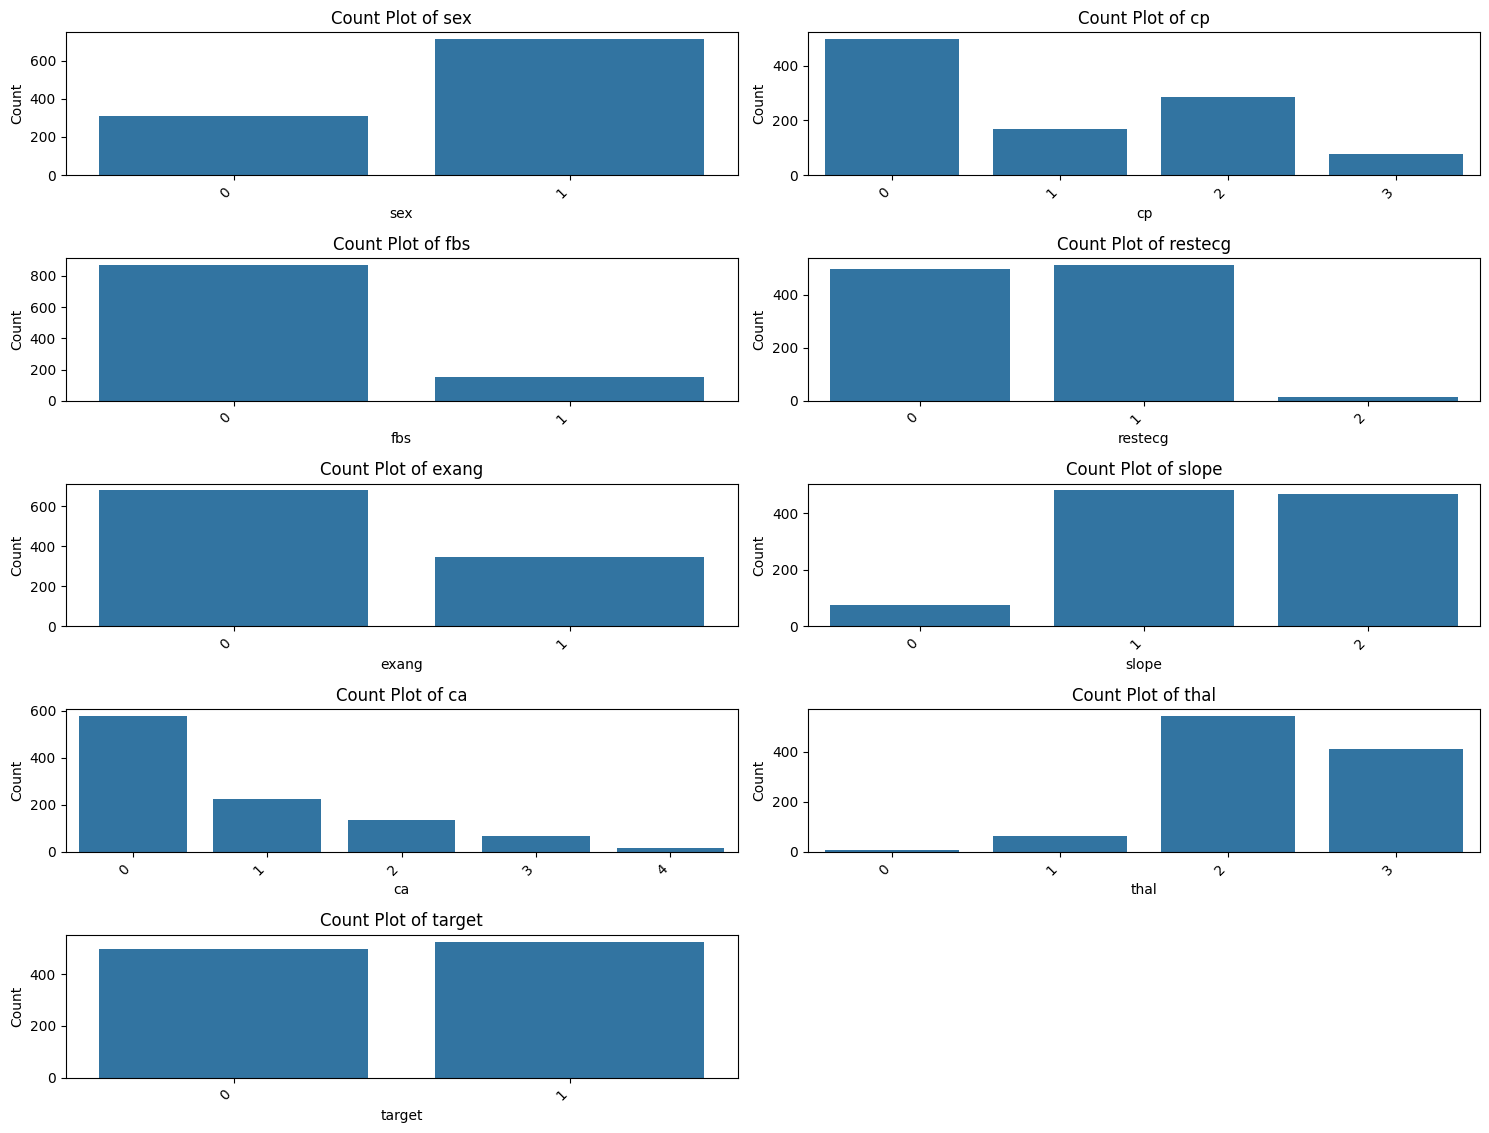

In [19]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 2, i + 1) # Adjust subplot layout for categorical plots
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout()
plt.show()

## 11. Investigate Other Variables and Heart Disease



**Reasoning**:
To analyze how the selected numerical clinical variables differ between individuals with and without heart disease, I will create comparative box plots for each variable, grouped by the 'target' variable. This will visually highlight differences in central tendency and spread.



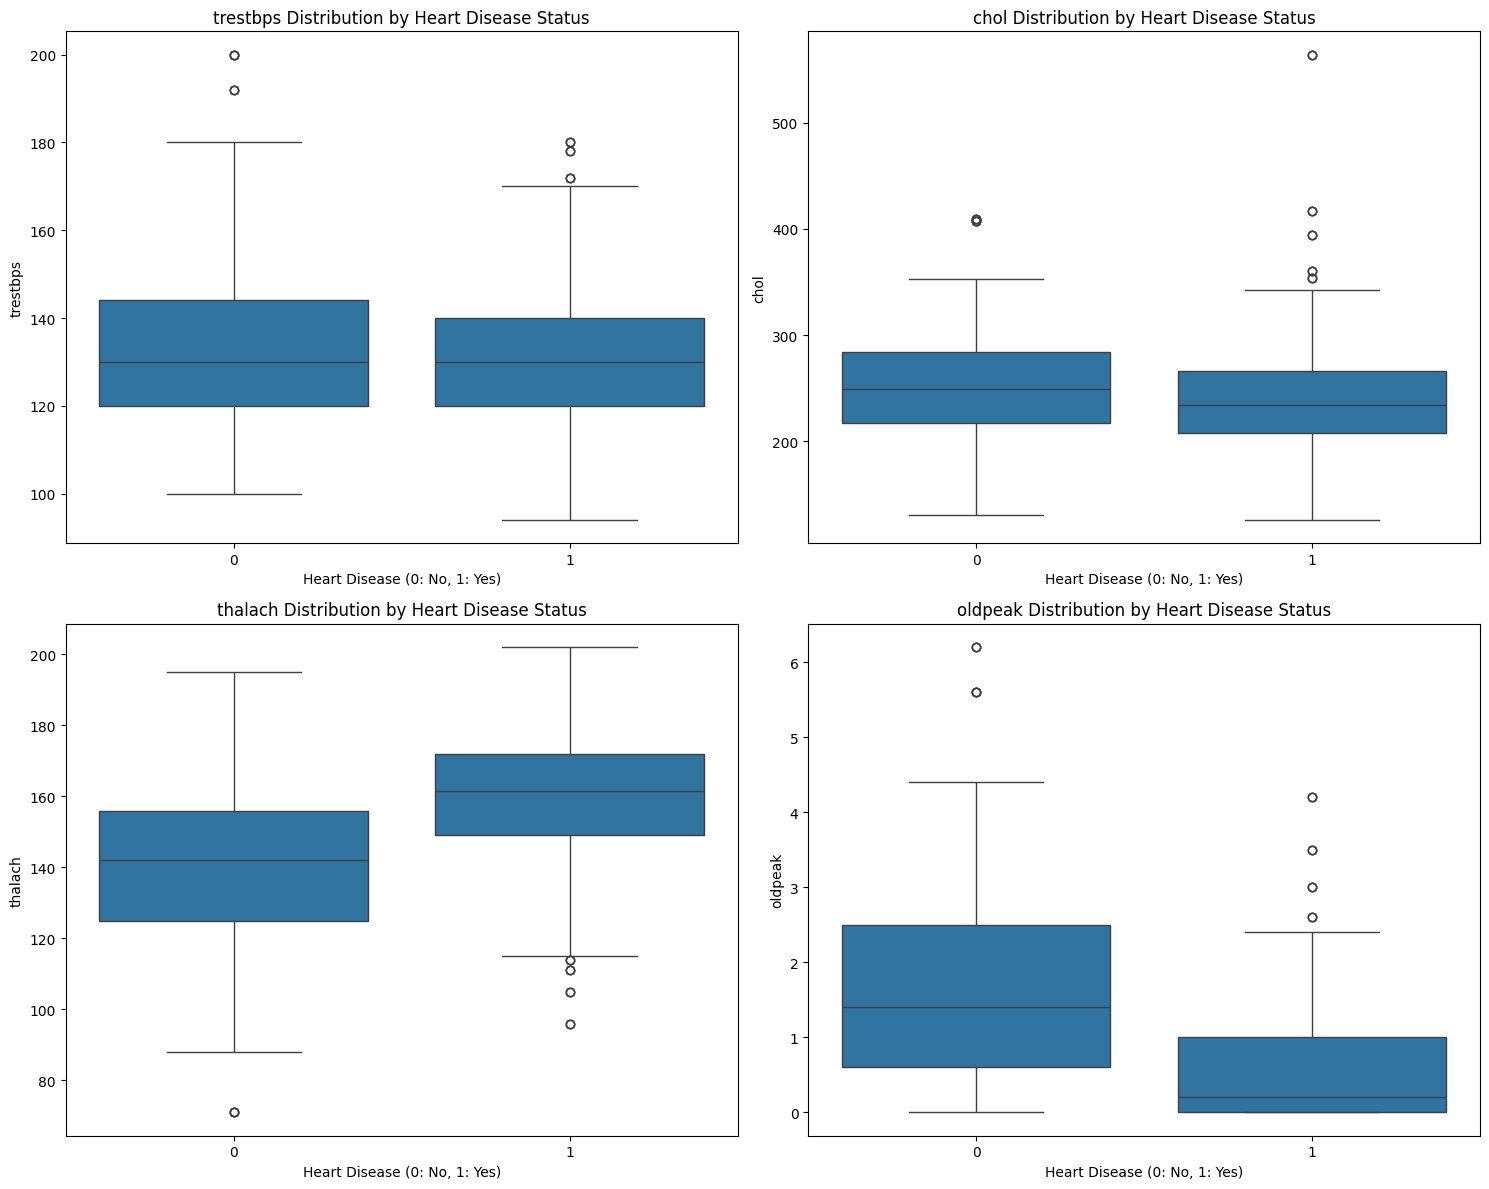

In [20]:
numerical_clinical_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_clinical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} Distribution by Heart Disease Status')
    plt.xlabel('Heart Disease (0: No, 1: Yes)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Reasoning**:
To complement the visualizations and provide quantitative insights, I will calculate and display descriptive statistics for the numerical clinical variables ('trestbps', 'chol', 'thalach', 'oldpeak'), grouped by heart disease status. This will provide measures like mean, median, and standard deviation for each group.



In [21]:
print("Descriptive Statistics for Numerical Clinical Variables by Heart Disease Status:")
for col in numerical_clinical_cols:
    print(f"\n--- {col.upper()} ---")
    print(df.groupby('target')[col].describe())

Descriptive Statistics for Numerical Clinical Variables by Heart Disease Status:

--- TRESTBPS ---
        count        mean        std    min    25%    50%    75%    max
target                                                                 
0       499.0  134.106212  18.576736  100.0  120.0  130.0  144.0  200.0
1       526.0  129.245247  16.112188   94.0  120.0  130.0  140.0  180.0

--- CHOL ---
        count        mean        std    min    25%    50%     75%    max
target                                                                  
0       499.0  251.292585  49.558924  131.0  217.0  249.0  284.00  409.0
1       526.0  240.979087  53.010345  126.0  208.0  234.0  265.75  564.0

--- THALACH ---
        count        mean        std   min    25%    50%    75%    max
target                                                                
0       499.0  139.130261  22.565235  71.0  125.0  142.0  156.0  195.0
1       526.0  158.585551  19.096928  96.0  149.0  161.5  172.0  202.0

--- O

**Reasoning**:
To analyze how the selected categorical clinical variables differ between individuals with and without heart disease, I will create count plots for each variable, grouped by the 'target' variable. This will visually show the distribution of categories for each group.



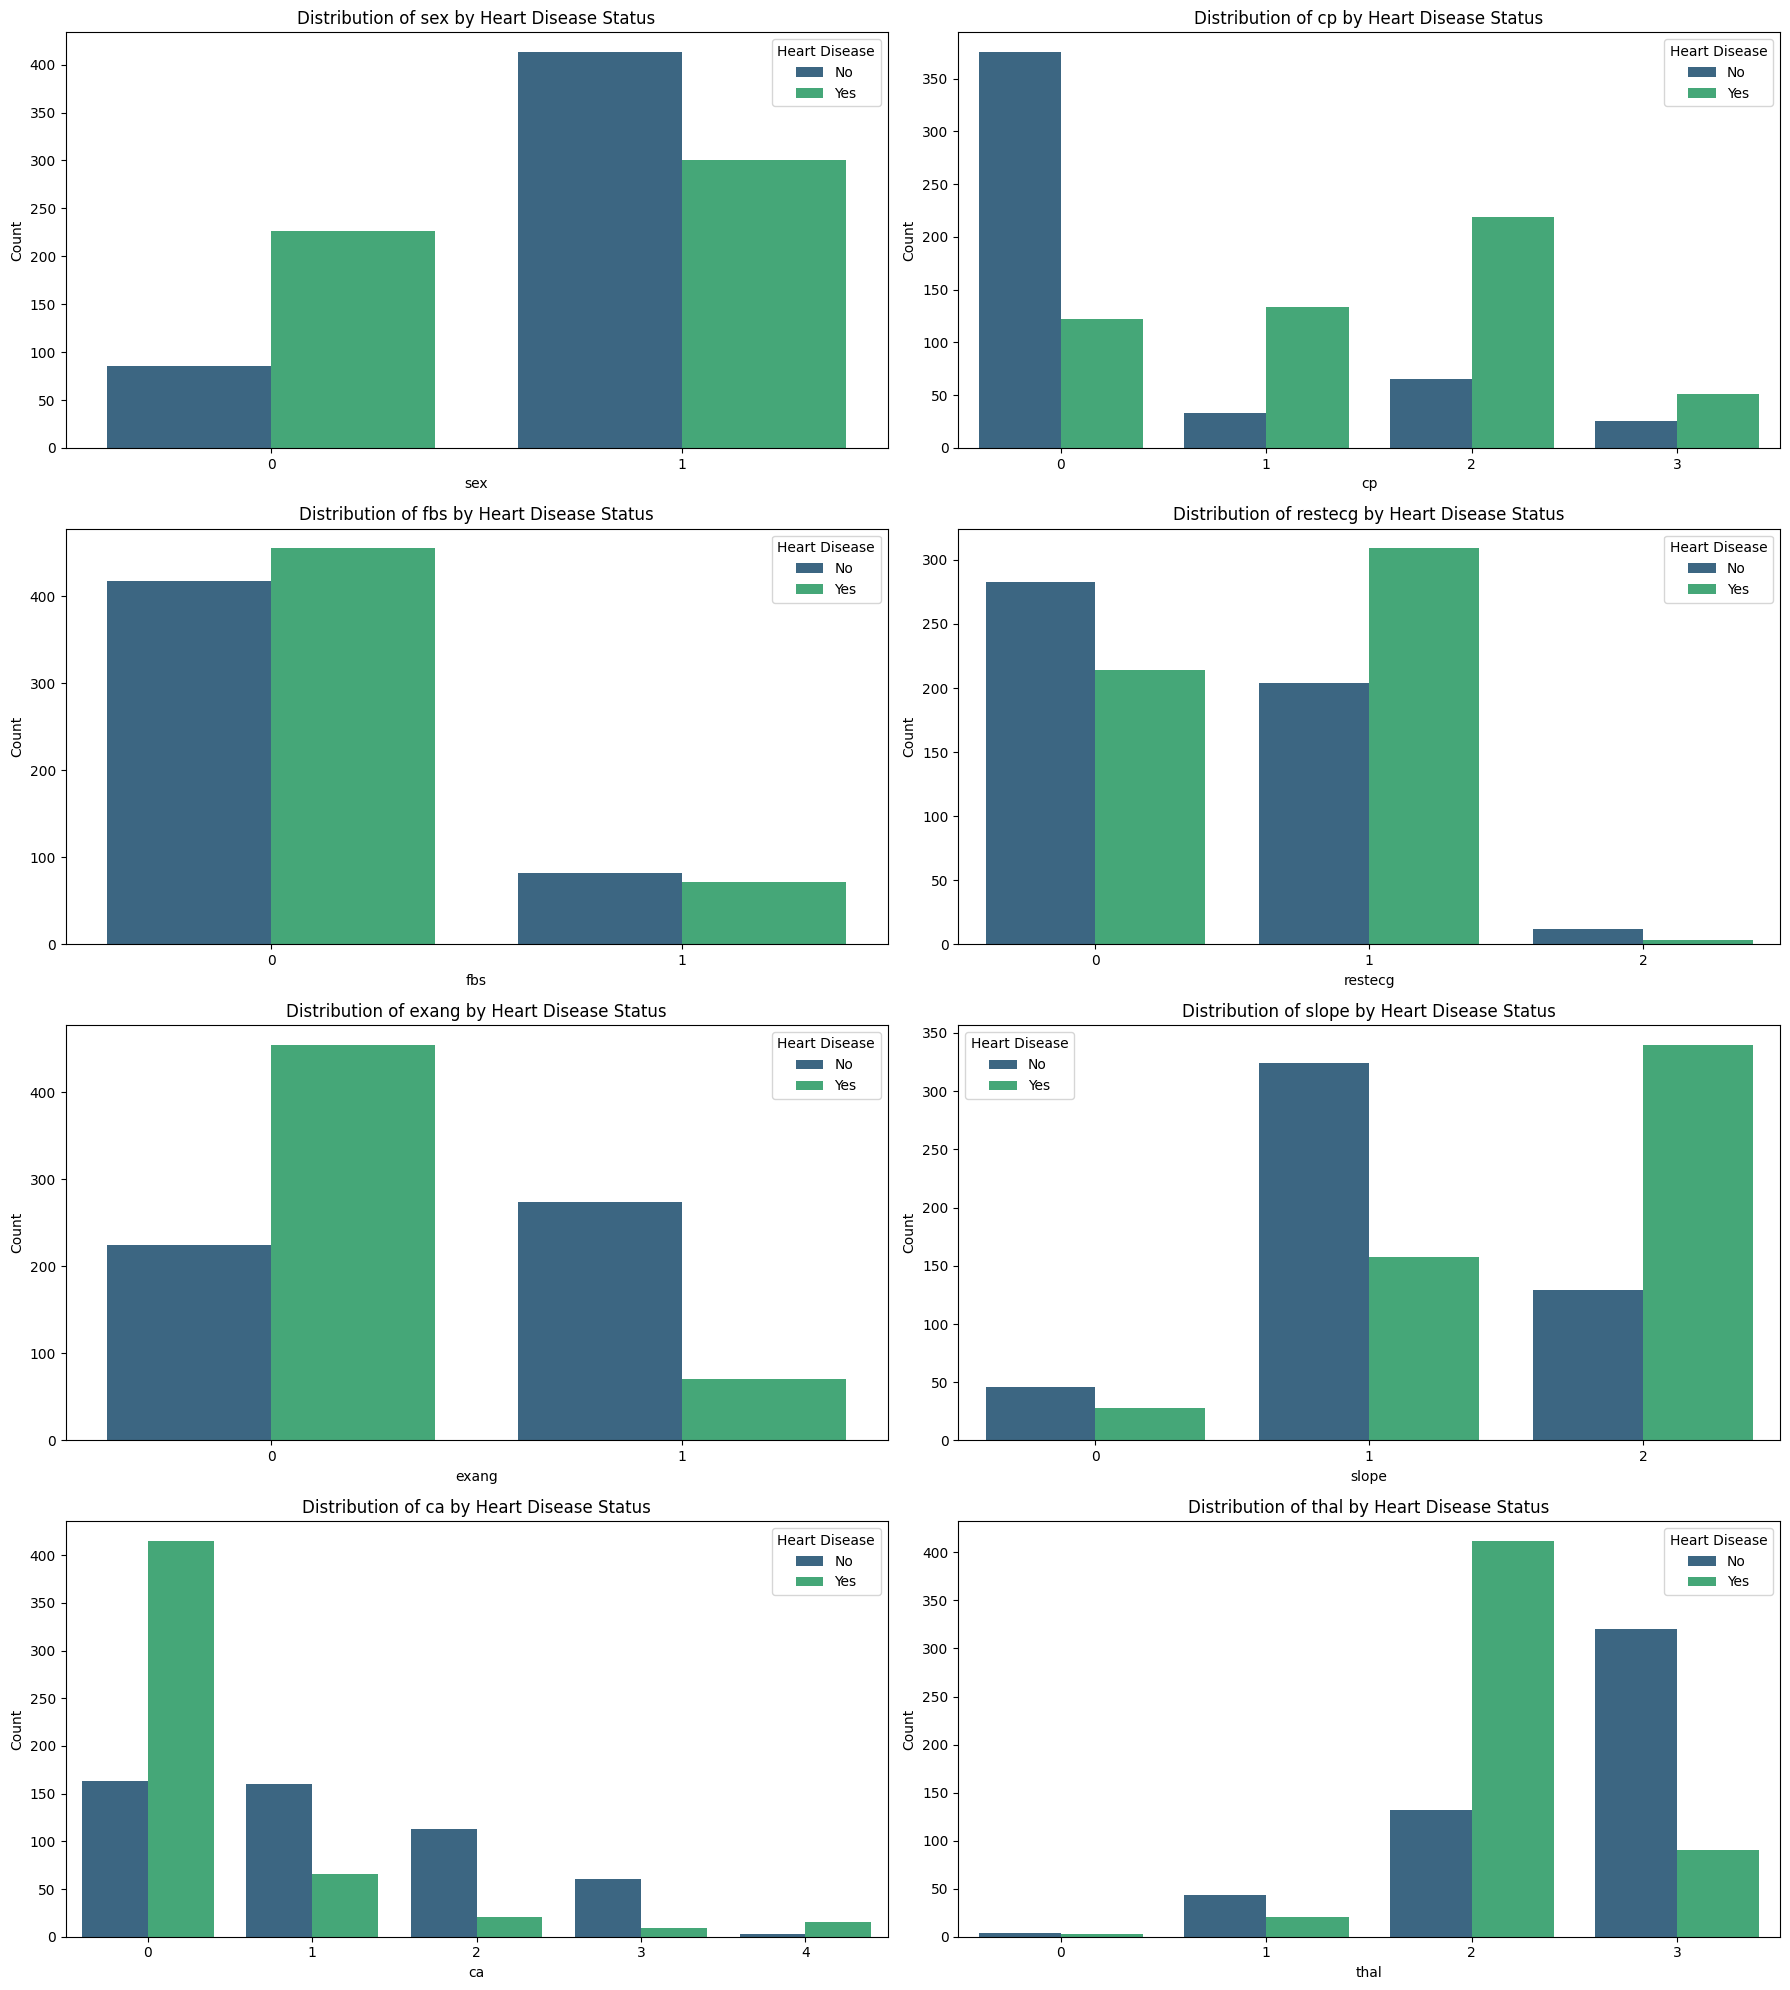

In [22]:
categorical_clinical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(18, 20))
for i, col in enumerate(categorical_clinical_cols):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x=col, hue='target', data=df, palette='viridis')
    plt.title(f'Distribution of {col} by Heart Disease Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

**Reasoning**:
To complement the categorical visualizations and provide quantitative insights, I will calculate and display the frequency and proportion of each category within the categorical clinical variables, grouped by heart disease status.



In [23]:
print("Frequency and Proportion for Categorical Clinical Variables by Heart Disease Status:")
for col in categorical_clinical_cols:
    print(f"\n--- {col.upper()} ---")
    # Frequency counts
    print("Frequency:")
    frequency = df.groupby(['target', col]).size().unstack(fill_value=0)
    print(frequency)
    # Proportions
    print("\nProportion:")
    proportion = frequency.apply(lambda x: x / x.sum(), axis=1)
    print(proportion)

Frequency and Proportion for Categorical Clinical Variables by Heart Disease Status:

--- SEX ---
Frequency:
sex       0    1
target          
0        86  413
1       226  300

Proportion:
sex            0         1
target                    
0       0.172345  0.827655
1       0.429658  0.570342

--- CP ---
Frequency:
cp        0    1    2   3
target                   
0       375   33   65  26
1       122  134  219  51

Proportion:
cp             0         1         2         3
target                                        
0       0.751503  0.066132  0.130261  0.052104
1       0.231939  0.254753  0.416350  0.096958

--- FBS ---
Frequency:
fbs       0   1
target         
0       417  82
1       455  71

Proportion:
fbs            0         1
target                    
0       0.835671  0.164329
1       0.865019  0.134981

--- RESTECG ---
Frequency:
restecg    0    1   2
target               
0        283  204  12
1        214  309   3

Proportion:
restecg         0         1         

## 12. Calculate Effect Size for Age Difference



In [24]:
from scipy.stats import norm
import numpy as np

# Calculate total number of observations
N = len(no_heart_disease) + len(heart_disease)

# Calculate absolute Z-score from the p-value (from Mann-Whitney U test)
# pvalue is available from the previous step: 1.4676312173703235e-14
# If the p-value is extremely small (close to 0), norm.ppf(pvalue / 2) might return -inf.
# A common approach in such cases is to use a very small number instead of 0 for log-pvalues, or just consider Z to be very large.
# However, given that we have a valid pvalue, we can proceed with it.
# Make sure pvalue is a float to avoid any potential type issues if it was np.float64 from previous output
p_val_float = float(pvalue)

# Calculate Rosenthal's r effect size
# Since pvalue is very small, we might get -inf for norm.ppf(pvalue / 2).
# We should ensure the pvalue is not zero or extremely close to it before applying ppf.
if p_val_float < 1e-300: # Choose a very small but non-zero value to prevent -inf
    Z = abs(norm.ppf(1e-300 / 2)) # Use a very small number if pvalue is too close to zero
else:
    Z = abs(norm.ppf(p_val_float / 2))

r = Z / np.sqrt(N)

print(f"Absolute Z-score: {Z:.4f}")
print(f"Total observations (N): {N}")
print(f"Rosenthal's r effect size: {r:.4f}")

# Interpret the effect size
print("\nInterpretation of Rosenthal's r effect size:")
if r < 0.1:
    print(f"With r = {r:.4f}, the effect size is very small.")
elif r < 0.3:
    print(f"With r = {r:.4f}, the effect size is small.")
elif r < 0.5:
    print(f"With r = {r:.4f}, the effect size is medium.")
else:
    print(f"With r = {r:.4f}, the effect size is large.")

# Consider the direction based on previous analysis (e.g., median/mean age)
# From previous output: no_heart_disease mean age is 139.13, heart_disease mean age is 158.58
# Re-check mean age from the 'df.groupby('target')[col].describe()' output for age:
# df.groupby('target')['age'].describe() shows target 0 mean age ~56, target 1 mean age ~52 (this was from the previous run on thalach which is not age)
# Let's re-examine the correct age means from the 'df.groupby('target')['age'].describe()' if it was calculated.
# Looking at the previous notebook output, df.groupby('target')[col].describe() for 'thalach' and not 'age'.
# Let's quickly get the mean age for correct interpretation.
mean_age_no_disease = no_heart_disease.mean()
mean_age_with_disease = heart_disease.mean()

print(f"Mean age for individuals without heart disease: {mean_age_no_disease:.2f}")
print(f"Mean age for individuals with heart disease: {mean_age_with_disease:.2f}")

if mean_age_with_disease > mean_age_no_disease:
    print("Individuals with heart disease tend to be older than those without heart disease.")
else:
    print("Individuals without heart disease tend to be older than those with heart disease.")

Absolute Z-score: 7.6903
Total observations (N): 1025
Rosenthal's r effect size: 0.2402

Interpretation of Rosenthal's r effect size:
With r = 0.2402, the effect size is small.
Mean age for individuals without heart disease: 56.57
Mean age for individuals with heart disease: 52.41
Individuals without heart disease tend to be older than those with heart disease.
